In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
assets = ['hd', 'tsla', 'vnet', 'wyy', 'cat', 'celh', 'erie', 'tsm']

In [3]:
# Assign Weights to the Stocks
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [4]:
# Asset file with Beginning prices being the actual price and ending prices being the forecasted price
from google.colab import files
uploaded = files.upload()

Saving pred_bilstm.csv to pred_bilstm.csv


In [5]:
df = pd.read_csv("pred_bilstm.csv")
df

,hd,tsla,vnet,wyy,cat,celh,erie,tsm
0,156.940353,26.375681,10.968772,3.567179,100.573364,1.336778,170.319122,44.168495
1,154.326340,28.535221,12.238803,3.595042,96.136498,1.345062,171.875656,44.461475
2,153.272141,28.216816,12.690858,3.543808,90.009804,1.349921,169.592575,43.920982
3,163.040421,31.593573,12.932629,3.635746,98.024780,1.378663,164.072220,45.716743
4,172.241806,34.537193,12.640038,3.896286,102.672378,1.325876,156.004868,47.419777
...,...,...,...,...,...,...,...,...
64,241.417587,51.658424,20.308599,6.969814,123.914139,2.735600,185.877655,55.718609
65,242.347366,51.783886,22.640604,6.837235,125.190506,2.872182,186.502960,56.245327
66,240.865540,50.818504,22.053219,7.206959,121.143951,2.822915,185.921356,56.423077
67,239.314682,50.623829,22.922695,7.091320,121.906693,2.864648,186.695526,56.534393


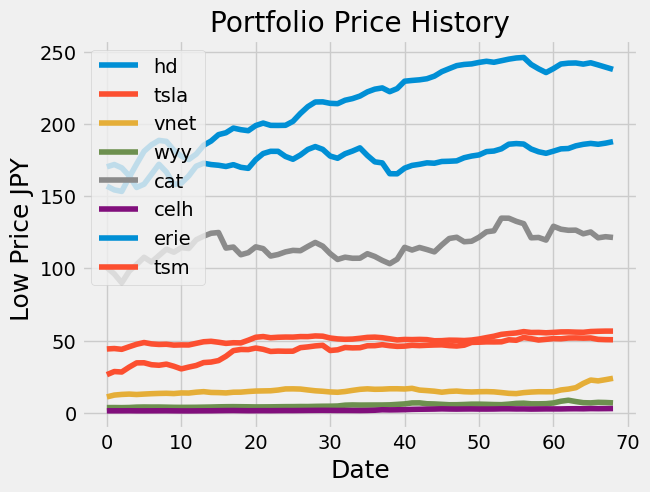

In [6]:
# Visually show the Stock/Portfolio
title = 'Portfolio Price History'

# Get the Stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Low Price JPY ', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [8]:
#Show the daily simple return
returns = df.pct_change()
returns

,hd,tsla,vnet,wyy,cat,celh,erie,tsm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016656,0.081876,0.115786,0.007811,-0.044116,0.006198,0.009139,0.006633
2,-0.006831,-0.011158,0.036936,-0.014251,-0.063729,0.003612,-0.013283,-0.012156
3,0.063732,0.119672,0.019051,0.025943,0.089046,0.021291,-0.032551,0.040886
4,0.056436,0.093172,-0.022624,0.071661,0.047412,-0.038289,-0.049170,0.037252
...,...,...,...,...,...,...,...,...
64,-0.003251,-0.003195,0.170136,-0.099947,-0.020031,-0.017416,0.005739,-0.001776
65,0.003851,0.002429,0.114828,-0.019022,0.010300,0.049928,0.003364,0.009453
66,-0.006114,-0.018643,-0.025944,0.054075,-0.032323,-0.017153,-0.003118,0.003160
67,-0.006439,-0.003831,0.039426,-0.016045,0.006296,0.014784,0.004164,0.001973


In [9]:
#Create & Show the annualized covariance Matrix
cov_matrix_cond = returns.cov() * 69
cov_matrix_cond

,hd,tsla,vnet,wyy,cat,celh,erie,tsm
hd,0.018536,0.019617,-0.005459,0.014099,0.021543,0.008731,0.003313,0.007714
tsla,0.019617,0.077999,0.005348,0.022670,0.015976,0.018033,-0.000867,0.014799
vnet,-0.005459,0.005348,0.111160,-0.016559,-0.008770,-0.012682,0.005903,0.003905
wyy,0.014099,0.022670,-0.016559,0.151277,0.010480,0.011113,0.002729,0.002973
cat,0.021543,0.015976,-0.008770,0.010480,0.083459,0.009119,0.007495,0.020503
celh,0.008731,0.018033,-0.012682,0.011113,0.009119,0.099239,0.008580,-0.002193
erie,0.003313,-0.000867,0.005903,0.002729,0.007495,0.008580,0.025353,0.001633
tsm,0.007714,0.014799,0.003905,0.002973,0.020503,-0.002193,0.001633,0.013455


In [10]:
#calculate the portfolio variance
port_var = np.dot(weights.T, np.dot(cov_matrix_cond, weights))
port_var

0.014999440189255253

In [11]:
#Calculate the portfolio Volatility i.e. STD DEV
port_vol = np.sqrt(port_var)
port_vol

0.12247220170003989

In [12]:
#Calculate the annual Portfolio return
port_simple_45days = np.sum(returns.mean() * weights) * 69
port_simple_45days

0.5197591795870892

In [13]:
#Showing the expected annual return, volatility and variance
pct_var = str(round(port_var, 2) * 69) + '%'
pct_risk = str(round(port_vol, 2) * 69) + '%'
pct_rtn = str(round(port_simple_45days, 2) * 69) + '%'

print('Expected Timely Return: ' + pct_rtn)
print('Risk/Volatility: ' + pct_risk)
print('Variance: ' + pct_var)

Expected Timely Return: 35.88%
Risk/Volatility: 8.28%
Variance: 0.6900000000000001%


In [14]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 983.8 kB/s eta 0:00:00


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
#Portfolio Optimization
#Calculate the Expected Returns
#Calculate the annualized Sample Covariance Matrix of Asset Returns
average = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#Optimize for Maximum Sharpe Ratio
ef_line = EfficientFrontier(average, s)
weights = ef_line.max_sharpe()
cleaned_weights = ef_line.clean_weights()
print(cleaned_weights)
ef_line.portfolio_performance(verbose = True)

OrderedDict([('hd', 0.15087), ('tsla', 0.07396), ('vnet', 0.3398), ('wyy', 0.11447), ('cat', 0.0), ('celh', 0.3209), ('erie', 0.0), ('tsm', 0.0)])
Expected annual return: 1359.7%
Annual volatility: 30.4%
Sharpe Ratio: 44.61


(13.596949960730342, 0.3043736482886179, 44.60619385767652)

In [17]:
#Get the discrete allocation for each pair of Stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 5000)

allocation , leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds Remaining: $ {:.2f}'.format(leftover))

Discrete Allocation:  {'hd': 3, 'tsla': 8, 'vnet': 71, 'wyy': 84, 'celh': 552}
Funds Remaining: $ 6.54


In [18]:
buy_hd = 3 * 156.94
sell_hd = 3 * 237.78
buy_tsla = 8 * 26.37
sell_tsla = 8 * 50.56
buy_vnet = 71 * 10.968
sell_vnet = 71 * 23.86
buy_wyy = 84 * 3.567
sell_wyy = 84 * 6.85
buy_celh = 552 * 1.3367
sell_celh = 552 * 2.909
funds_remaining = 6.54
approximate_gain = (sell_hd + sell_tsla + sell_vnet + sell_wyy + sell_celh) - (buy_hd + buy_tsla + buy_vnet + buy_wyy + buy_celh) + funds_remaining
print('Approximate Gain: $', approximate_gain)

Approximate Gain: $ 2501.5935999999997
